Surprisingly, a strong minority current of modern statistical theory offers the possibility of avoiding both the <b>magic and assumptions of </b>classical statistical theory through randomization techniques known collectively as resampling.  <p>These techniques take a given sample and either create new sam- ples by randomly selecting values from the given sample with <b>replacement</b>, or by randomly shuffling labels on the data. The questions answered are familiar:<p>
   <ul>
       <li> How accurate is the measurement likely to be (confidence interval)?</li><li> And, could it have happened by mistake (significance)? </li></ul>

The idea of resampling is actually quite an old one in statistics, dating to at least 1935, but the application of such techniques had to wait until faster computers came along. <b>Resampling procedures are highly computer-intensive</b>. While we can discuss such tests in the abstract, and can actually carry them out with pencil and paper on tiny data sets, the practical application requires thousands of resampled data sets.

The idea of resampling is actually quite an old one in statistics, dating to at least 1935, but the application of such techniques had to wait until faster computers came along. Resampling procedures are highly computer-intensive. While we can discuss such tests in the abstract, and can actually carry them out with pencil and paper on tiny data sets, the practical application requires thousands of resampled data sets.


You toss a coin  17 times and it comes up heads all but 2 times. 
<<b>How might you determine whether it is reasonable to believe the coin is fair?<b>
    <h2>Solution I</h2>
You could ask to compute the percentage of times that you would get this result if the fairness assumption were true. Probability theory would suggest using the binomial distribution. But, you may have forgot- ten the formula or the derivation. So, you might look it up or at least remember the name so you could get software to do it. The net effect is that you wouldn’t understand much, unless you were up on your probability theory.
<h2>Solution II</h2>    
 do an experiment 10,000 times with a fair coin: throw it 17 times and calculate the percentage of times you get 15 <b>times or more</b>.
    
    
  

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

observed_number_of_heads = 15 
number_of_tosses = 17 
probability_of_head = 0.5
number_of_bootstraps = 10000

In [7]:
#one trial where we simulate tossing a coin seventimes
#and countingt the success
#Draw samples from a binomial distribution.
np.random.binomial(number_of_tosses,probability_of_head)

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.
>>>

>>> sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.
# answer = 0.38885, or 38%.



In [16]:
trials=np.random.binomial(number_of_tosses,probability_of_head,number_of_bootstraps)
print(len(trials))
trials[0]


10000


11

In [5]:
np.equal(trials,8) #the trials with sucess

array([False, False, False, ..., False, False, False])

In [6]:
probs_100 = [np.equal(trials,i).mean() for i in range(number_of_tosses)]

In [7]:
probs_100[16]+probs_100[15]+probs_100[14]

0.007500000000000001

In [8]:
plt.xticks(range(number_of_tosses))
plt.plot(list(range(number_of_tosses)), probs_100, color='blue', marker='o')
plt.xlabel('Number of Heads',fontsize=14)
plt.ylabel('Probability',fontsize=14)

Text(0, 0.5, 'Probability')

Text(0, 0.5, 'Probability')

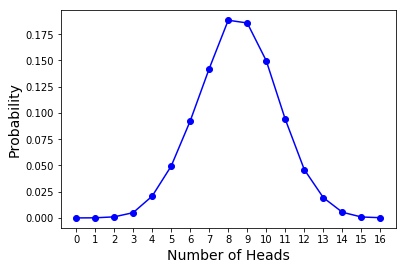

Imagine we have given some people a placebo and others a drug. The measured improvement (the more positive the better) is:
<p>Placebo: 54 51 58 44 55 52 42 47 58 46</p>
<p>Drug: 54 73 53 70 73 68 52 65 65</p>
<h2>Formula-based statistics</h2>
    would use a t-test which entails certain assumptions about normality and variance (population mean and variance is not known, but population is assumed Gaussian)
    <h2> bootstrapping </h2>   
    Just look at the samples them- selves and shuffle the labels.
    


In [17]:
Drug=[54, 73, 53, 70, 73, 68, 52, 65, 65]
Placebo=[ 54, 51, 58, 44, 55, 52, 42, 47, 58, 46]

npPlacebo=np.array(Placebo)

npDrug=np.array(Drug)



In [18]:
npDrug.mean()

63.666666666666664

In [19]:
npPlacebo.mean()

50.7

Is the difference real? (a) do the t test, b) do an experiment?) 


In [22]:
data=np.concatenate((npDrug,npPlacebo), axis=None)
#recall first npsize items (=9) represent drug results and the rest represents 
#placebo results
data

array([54, 73, 53, 70, 73, 68, 52, 65, 65, 54, 51, 58, 44, 55, 52, 42, 47,
       58, 46])

In [23]:
#shuffle the data , np.random.shuffle shuffles the data inplace
np.random.shuffle(data)
data

array([52, 55, 46, 58, 68, 65, 65, 54, 58, 44, 42, 70, 51, 53, 73, 47, 52,
       54, 73])

In [24]:
data[:npDrug.size].mean()

57.888888888888886

In [25]:
data[npDrug.size:].mean()

55.9

In [26]:
data[:npDrug.size].mean()-data[npDrug.size:].mean()

1.9888888888888872

In [38]:
meanobserved=npDrug.mean()-npPlacebo.mean()

In [28]:
experiments=list()
for i in range(number_of_bootstraps):
    np.random.shuffle(data)
    experiments.append((data[:npDrug.size].mean()-data[npDrug.size:].mean()))

In [29]:
import pandas as pd


In [33]:
pdExperiment=pd.DataFrame(experiments)
npExperiment=np.array(experiments)
npExperiment
pdExperiment.head()

0
0 -0.544444
1  0.300000
2 -3.077778
3  4.311111
4  1.566667

In [37]:
#if you want to convert the stats table into a pandas dataframe and manipulate it
pdStatistics=pdExperiment[0].value_counts(normalize=True).reset_index()
pdStatistics.head()

index       0
0 -1.600000  0.0207
1  1.355556  0.0191
2 -0.966667  0.0190
3 -0.544444  0.0190
4 -1.388889  0.0189

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1229f4a20>,
      dtype=object)

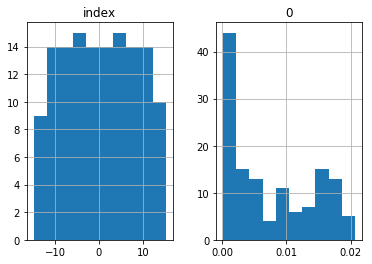

In [35]:
pdStatistics.hist()

In [32]:
pdStatistics[0][pdStatistics["index"]>meanobserved].sum()

0.0006000000000000001

Which means if we had replaced some placebo measurments with real drug experiments 10000 times the probabilty that we observe the distribution of values  is less then 0.01 percent.
<p> Therefore, we conclude that the difference between the averages of the samples is real. This is what statisticians call significant.</p>

In [42]:
#show the stats sorted by distinct values in column ‘c’ instead of counts.
pdExperiment[0].value_counts(normalize=True).sort_index()

-14.900000    0.0001
-14.266667    0.0001
-13.844444    0.0001
-13.211111    0.0001
-13.000000    0.0002
-12.788889    0.0001
-12.577778    0.0002
-12.155556    0.0002
-11.944444    0.0002
-11.733333    0.0010
-11.522222    0.0006
-11.311111    0.0005
-11.100000    0.0009
-10.888889    0.0013
-10.677778    0.0007
-10.466667    0.0014
-10.255556    0.0011
-10.044444    0.0013
-9.833333     0.0023
-9.622222     0.0020
-9.411111     0.0019
-9.200000     0.0028
-8.988889     0.0038
-8.777778     0.0035
-8.566667     0.0035
-8.355556     0.0042
-8.144444     0.0036
-7.933333     0.0027
-7.722222     0.0035
-7.511111     0.0056
               ...  
 8.111111     0.0047
 8.322222     0.0037
 8.533333     0.0040
 8.744444     0.0034
 8.955556     0.0031
 9.166667     0.0024
 9.377778     0.0019
 9.588889     0.0018
 9.800000     0.0020
 10.011111    0.0017
 10.222222    0.0014
 10.433333    0.0013
 10.644444    0.0010
 10.855556    0.0007
 11.066667    0.0011
 11.277778    0.0005
 11.488889   

 the confidence interval of an imperfectly repeatable measurement is defined by the range of values the measurement is likely to take. In resampling statistics as in traditional statistics, this range is commonly defined as the middle 90% (or sometimes 95%) of the possible values. If you’ve been following carefully so far, you will guess that the set of possible values will be based on repeated random samples of some sort. In the drug case, we will take many samples from the patient data we have and then look at the difference between the average drug improvement and the average placebo improvement. We’ll look at the range of these differences and compute the confi- dence interval. This technique is called bootstrapping.



<p><b> method</b>: create new samples of the same size as the original by choosing values from the original sample “uniformly at random and with replacement.”<p>

<b>in forming a new sample (called a bootstrap sample), we choose uniformly at random on the original sample and may choose some elements twice or more and some elements no times at all.</b>